In [1]:
import glob
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

base_path = "/Users/saraawad/Desktop/Datasets/Google/Ameriflux/"

In [2]:
file_path = os.path.join(base_path, "Ameriflux_Daily_Filtered_Classified.csv")
df = pd.read_csv(file_path, delimiter=',')

df.head()

Site Id        Date Day Status  RH  NETRAD  TA   P  WS  H2O   H  \
0  US-SO2  1997-01-01        Bad NaN     NaN NaN NaN NaN  NaN NaN   
1  US-SO2  1997-01-02        Bad NaN     NaN NaN NaN NaN  NaN NaN   
2  US-SO2  1997-01-03        Bad NaN     NaN NaN NaN NaN  NaN NaN   
3  US-SO2  1997-01-04        Bad NaN     NaN NaN NaN NaN  NaN NaN   
4  US-SO2  1997-01-05        Bad NaN     NaN NaN NaN NaN  NaN NaN   

            ...             WS_PI_F_1_1_1  Year  Month  Day  LE (mm)  \
0           ...                       NaN  1997      1    1      NaN   
1           ...                       NaN  1997      1    2      NaN   
2           ...                       NaN  1997      1    3      NaN   
3           ...                       NaN  1997      1    4      NaN   
4           ...                       NaN  1997      1    5      NaN   

   LE_1_1_1(mm)  LE_PI_F(mm)  LE_PI_F_1_1_1(mm)  LE_SSITC_TEST(mm)  \
0           NaN          NaN                NaN                NaN   
1           NaN          NaN                NaN                NaN   
2           NaN          NaN                NaN                NaN   
3           NaN          NaN                NaN                NaN   
4           NaN          NaN                NaN                NaN   

   LE_SSITC_TEST_1_1_1(mm)  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  

[5 rows x 36 columns]

<h3> Plot sites Good & Bad </h3>

site id: US-SO2 years: [1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007]


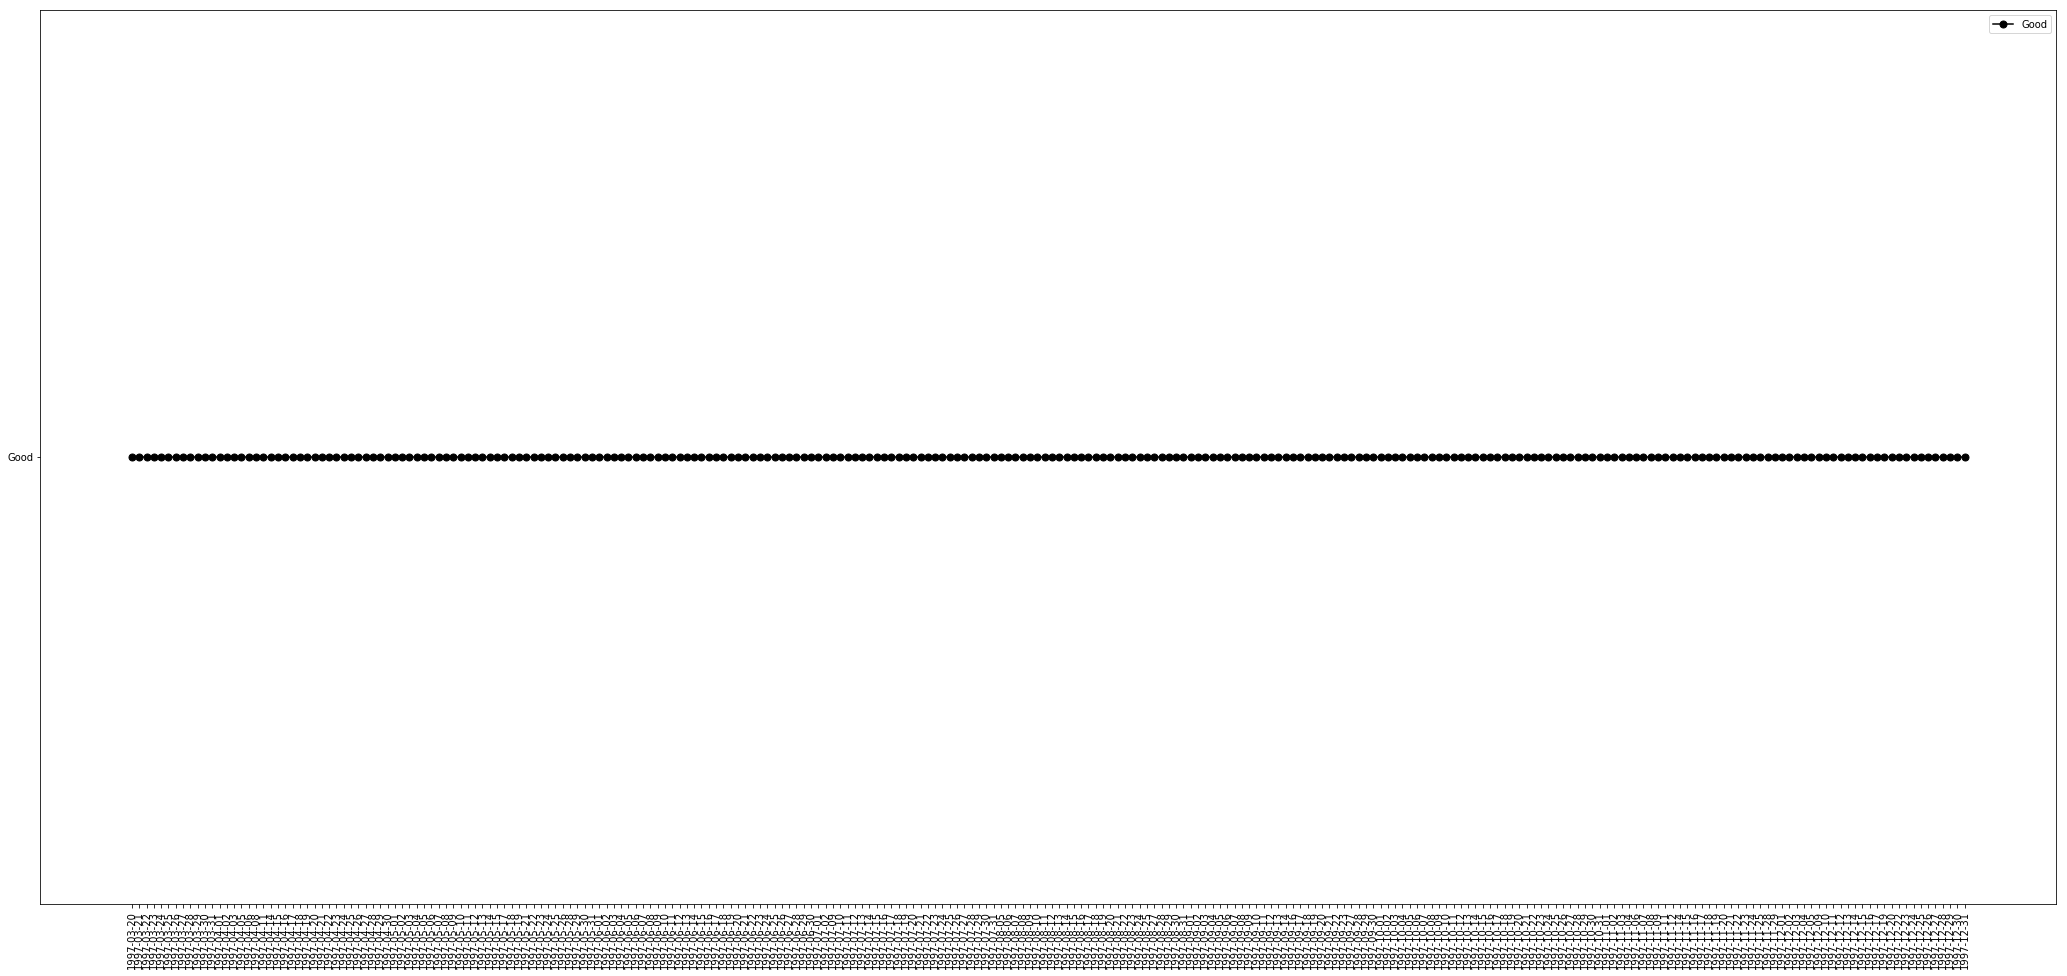

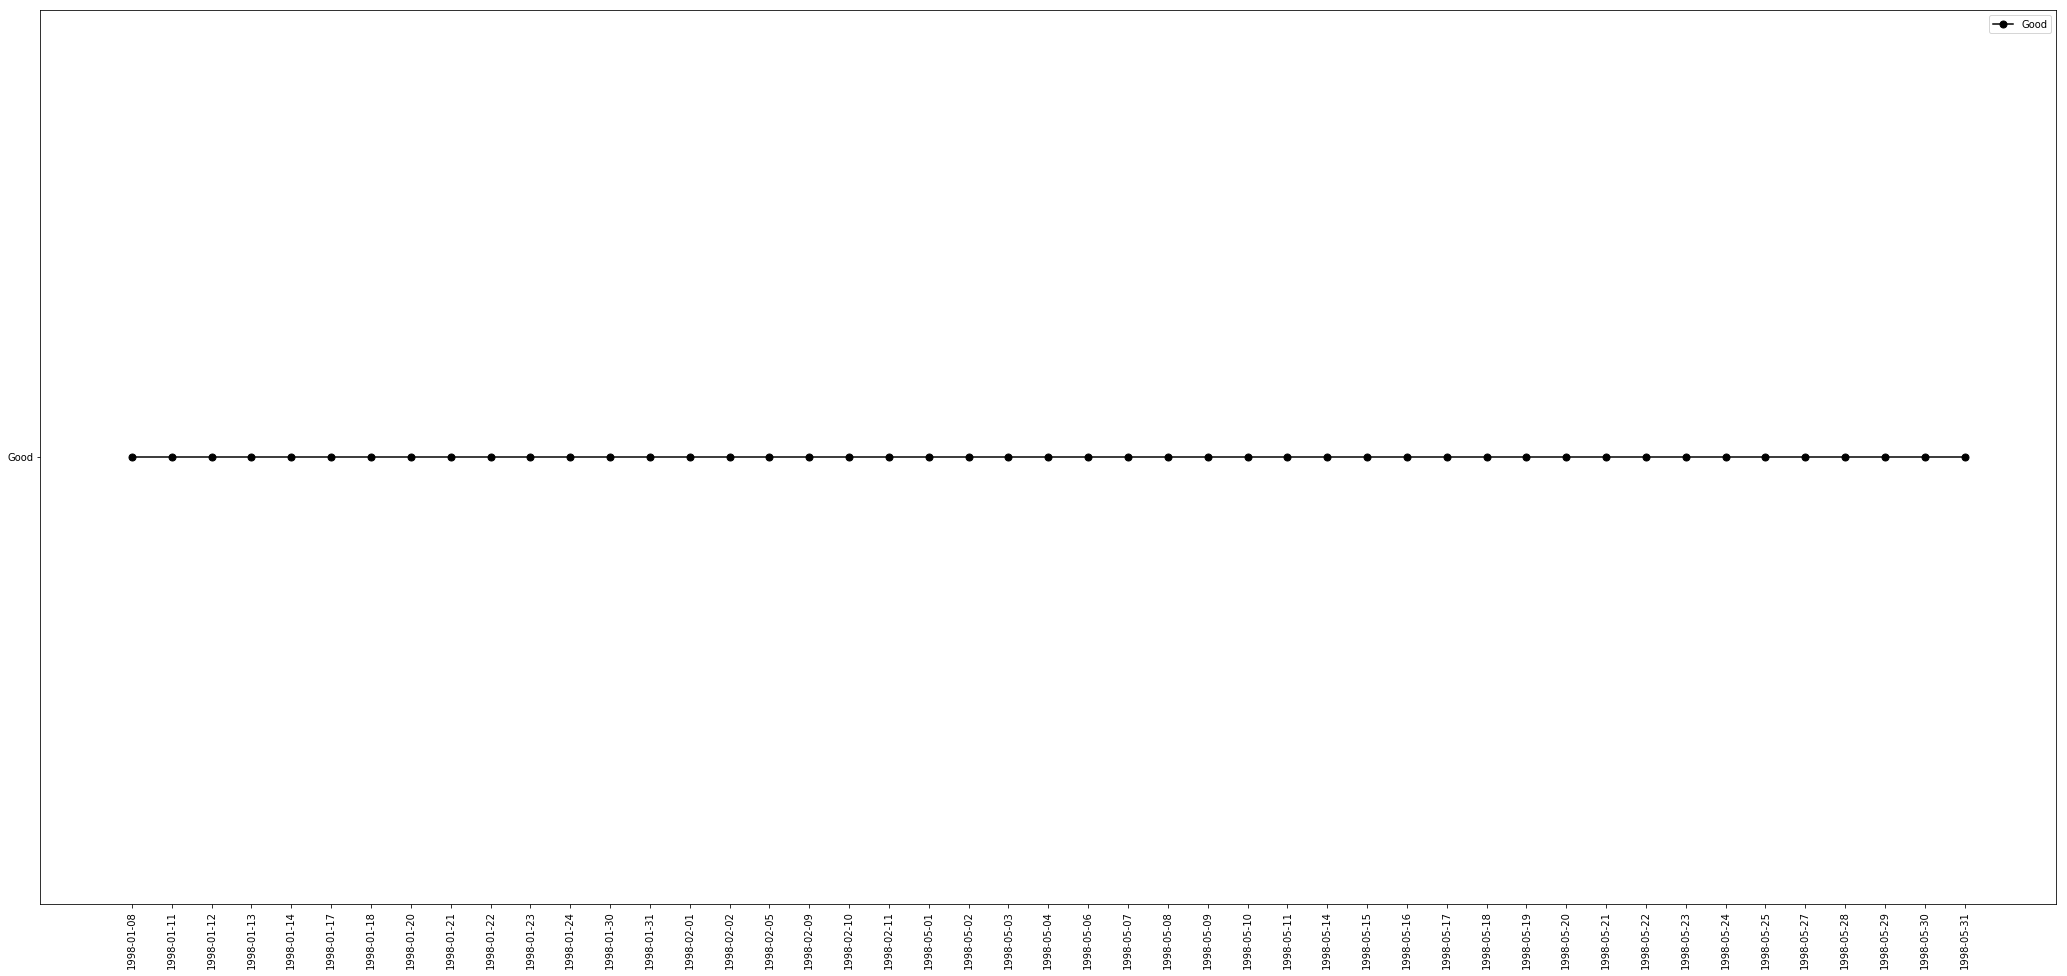

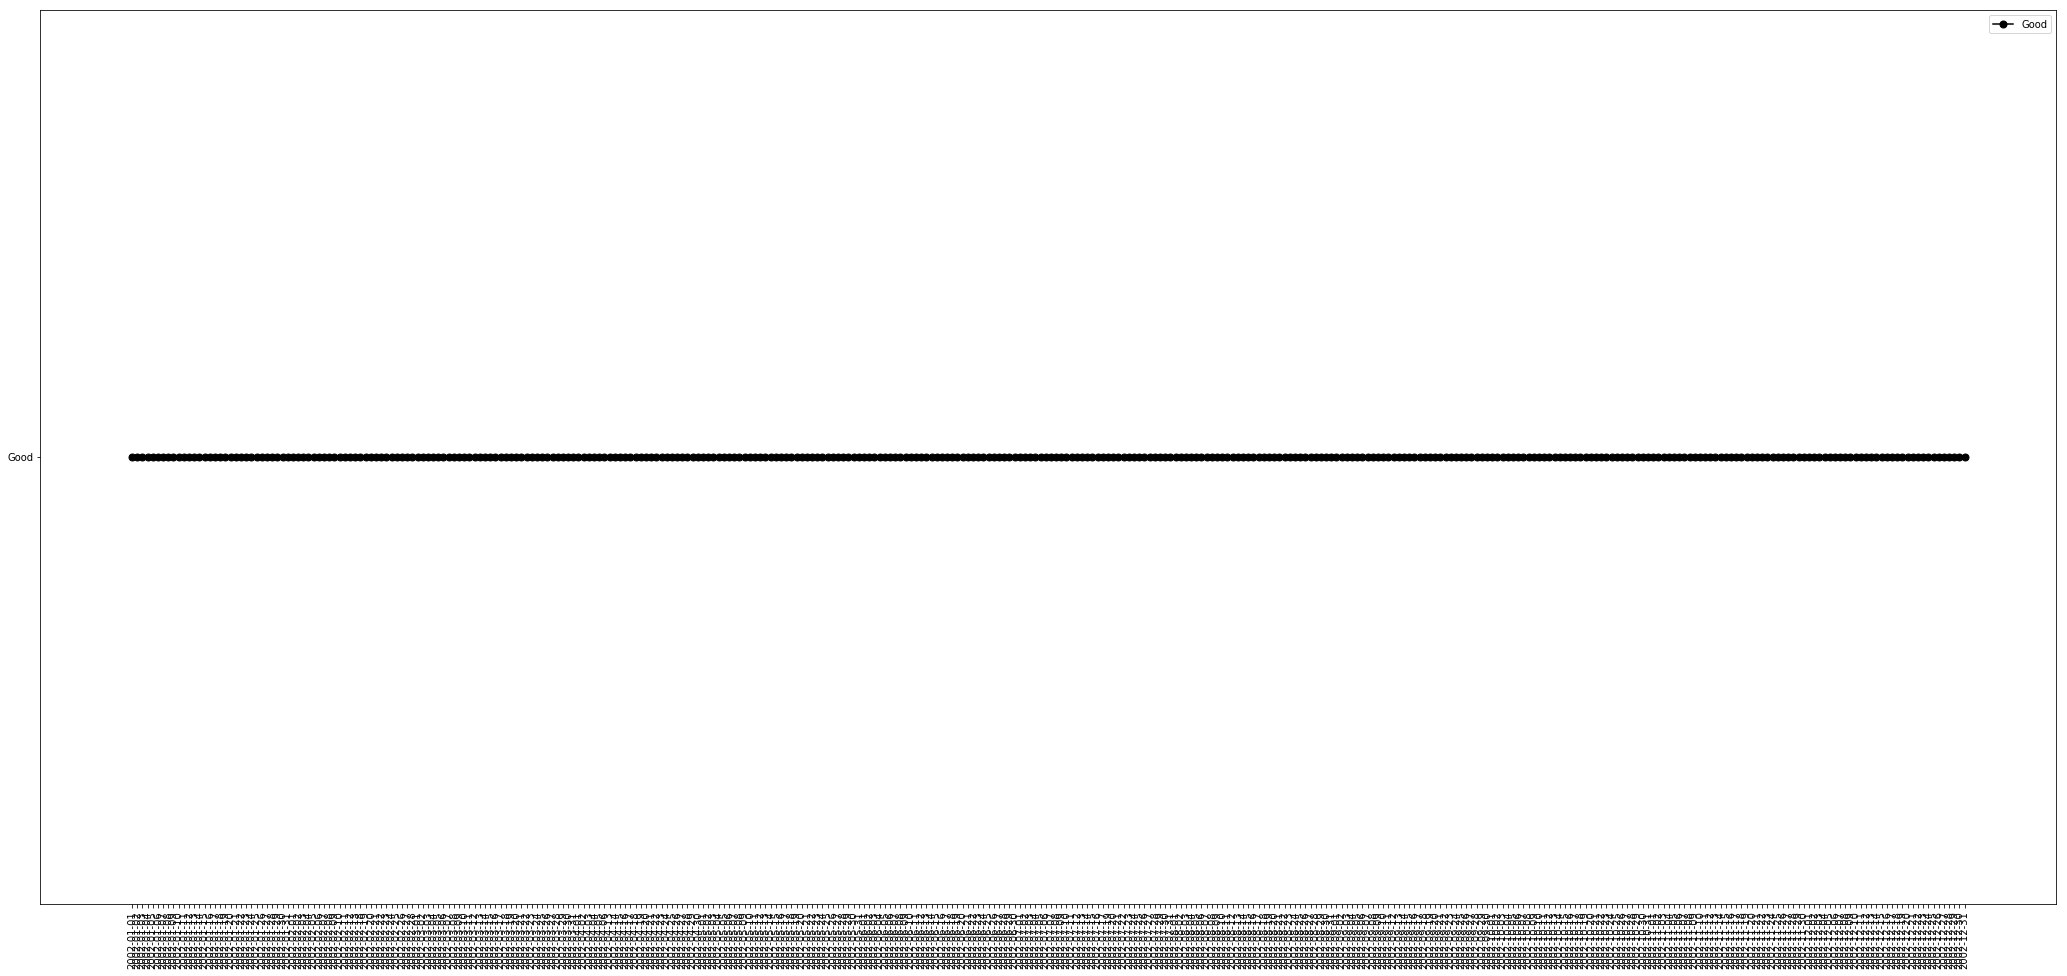

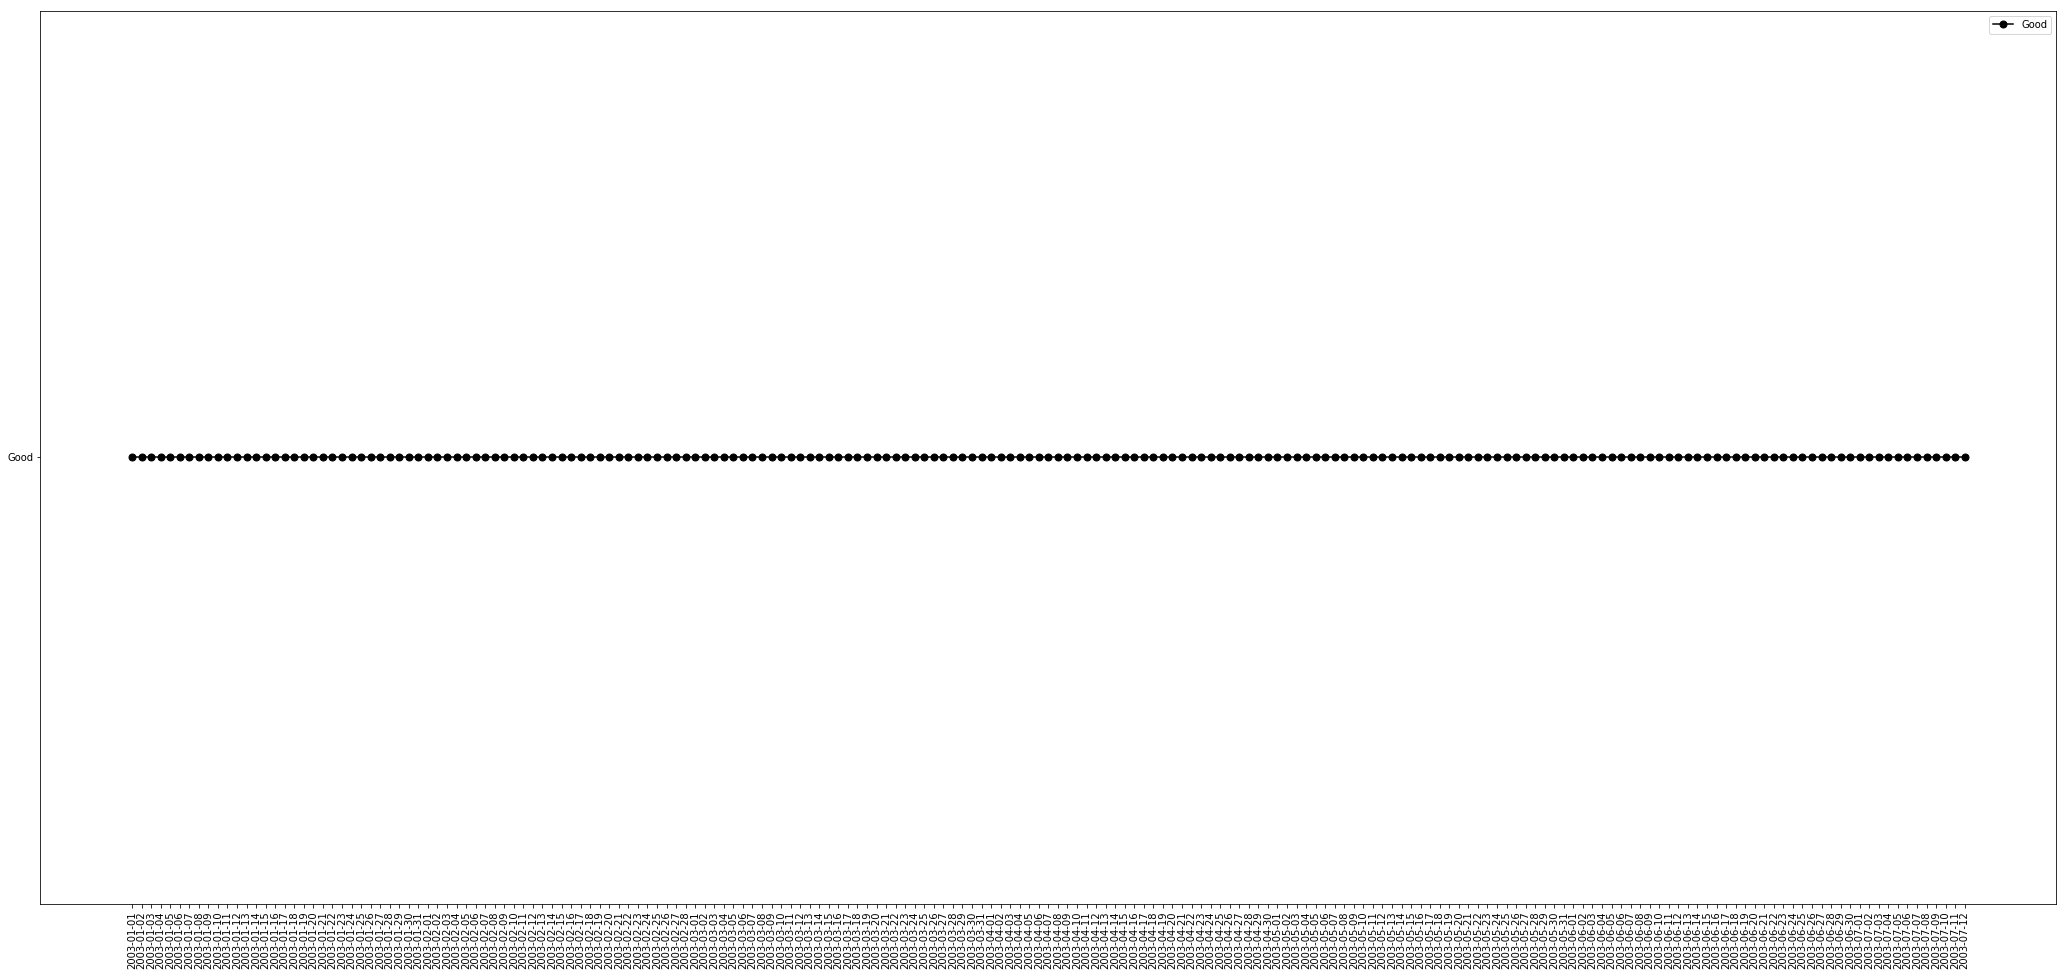

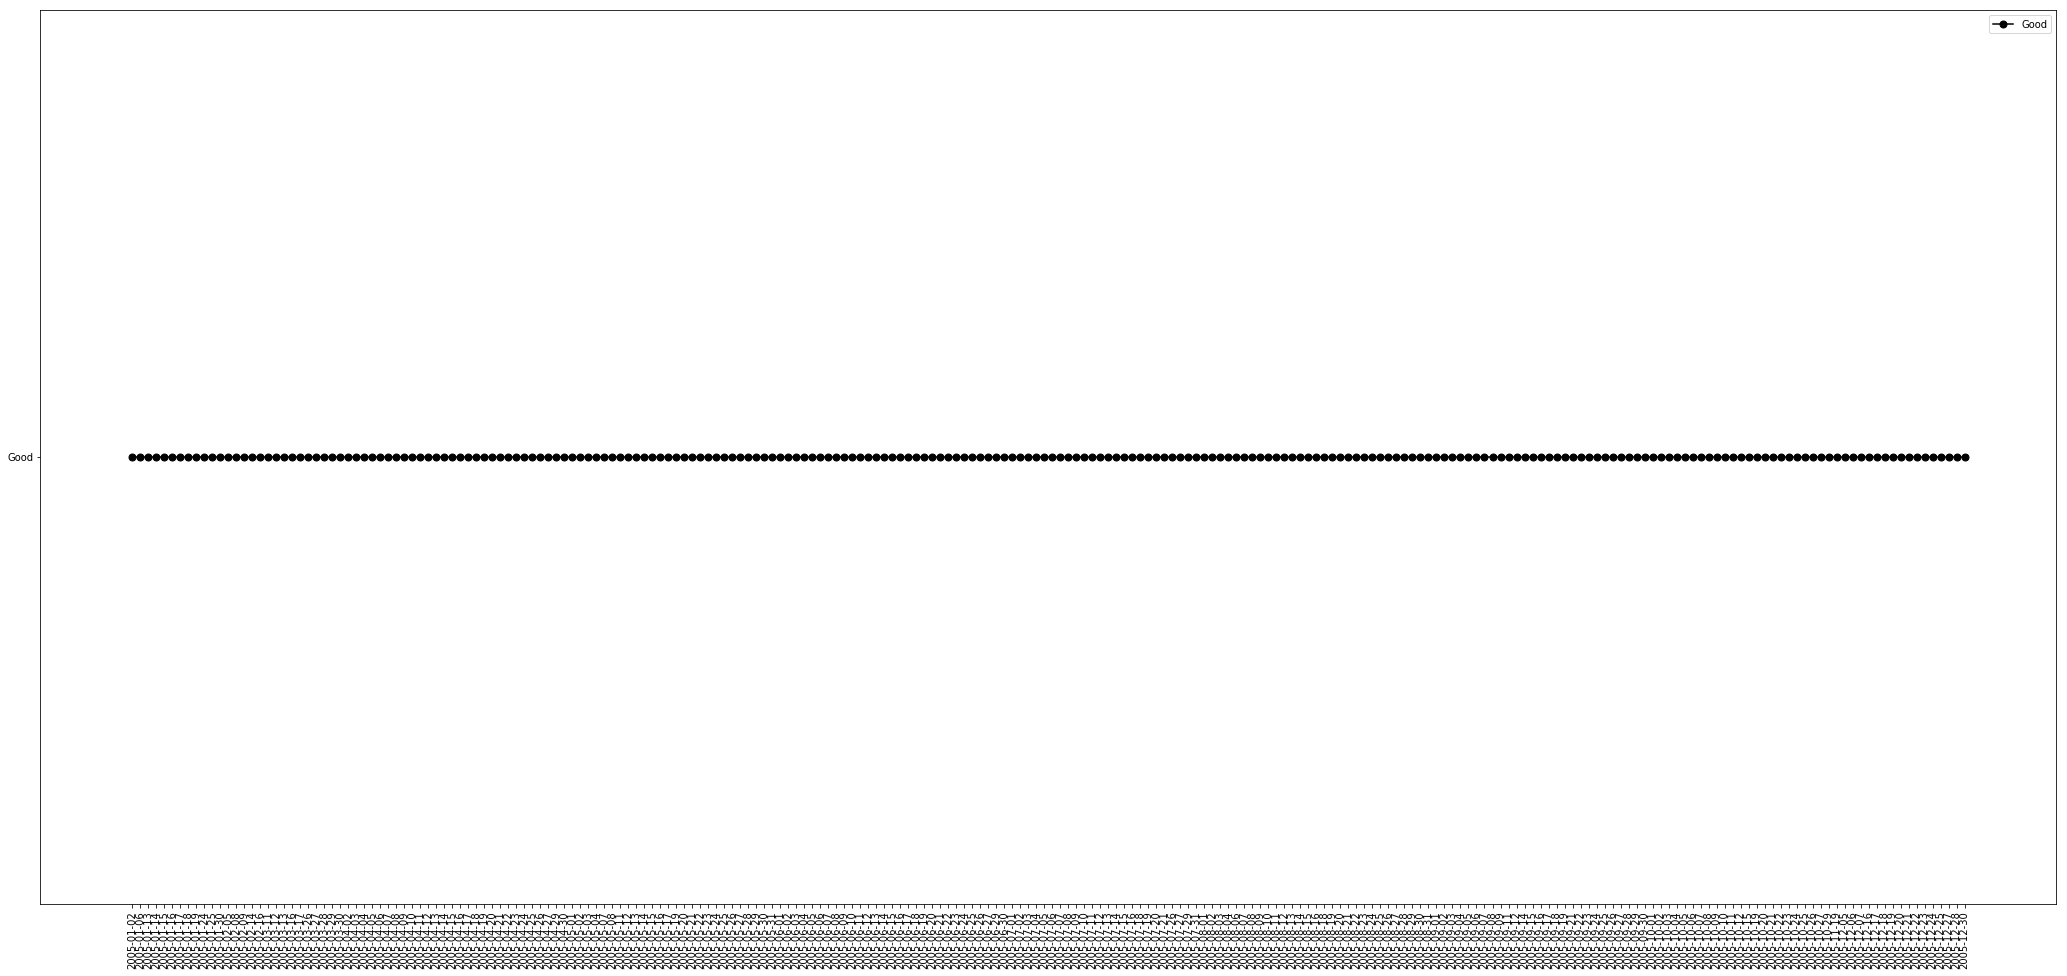

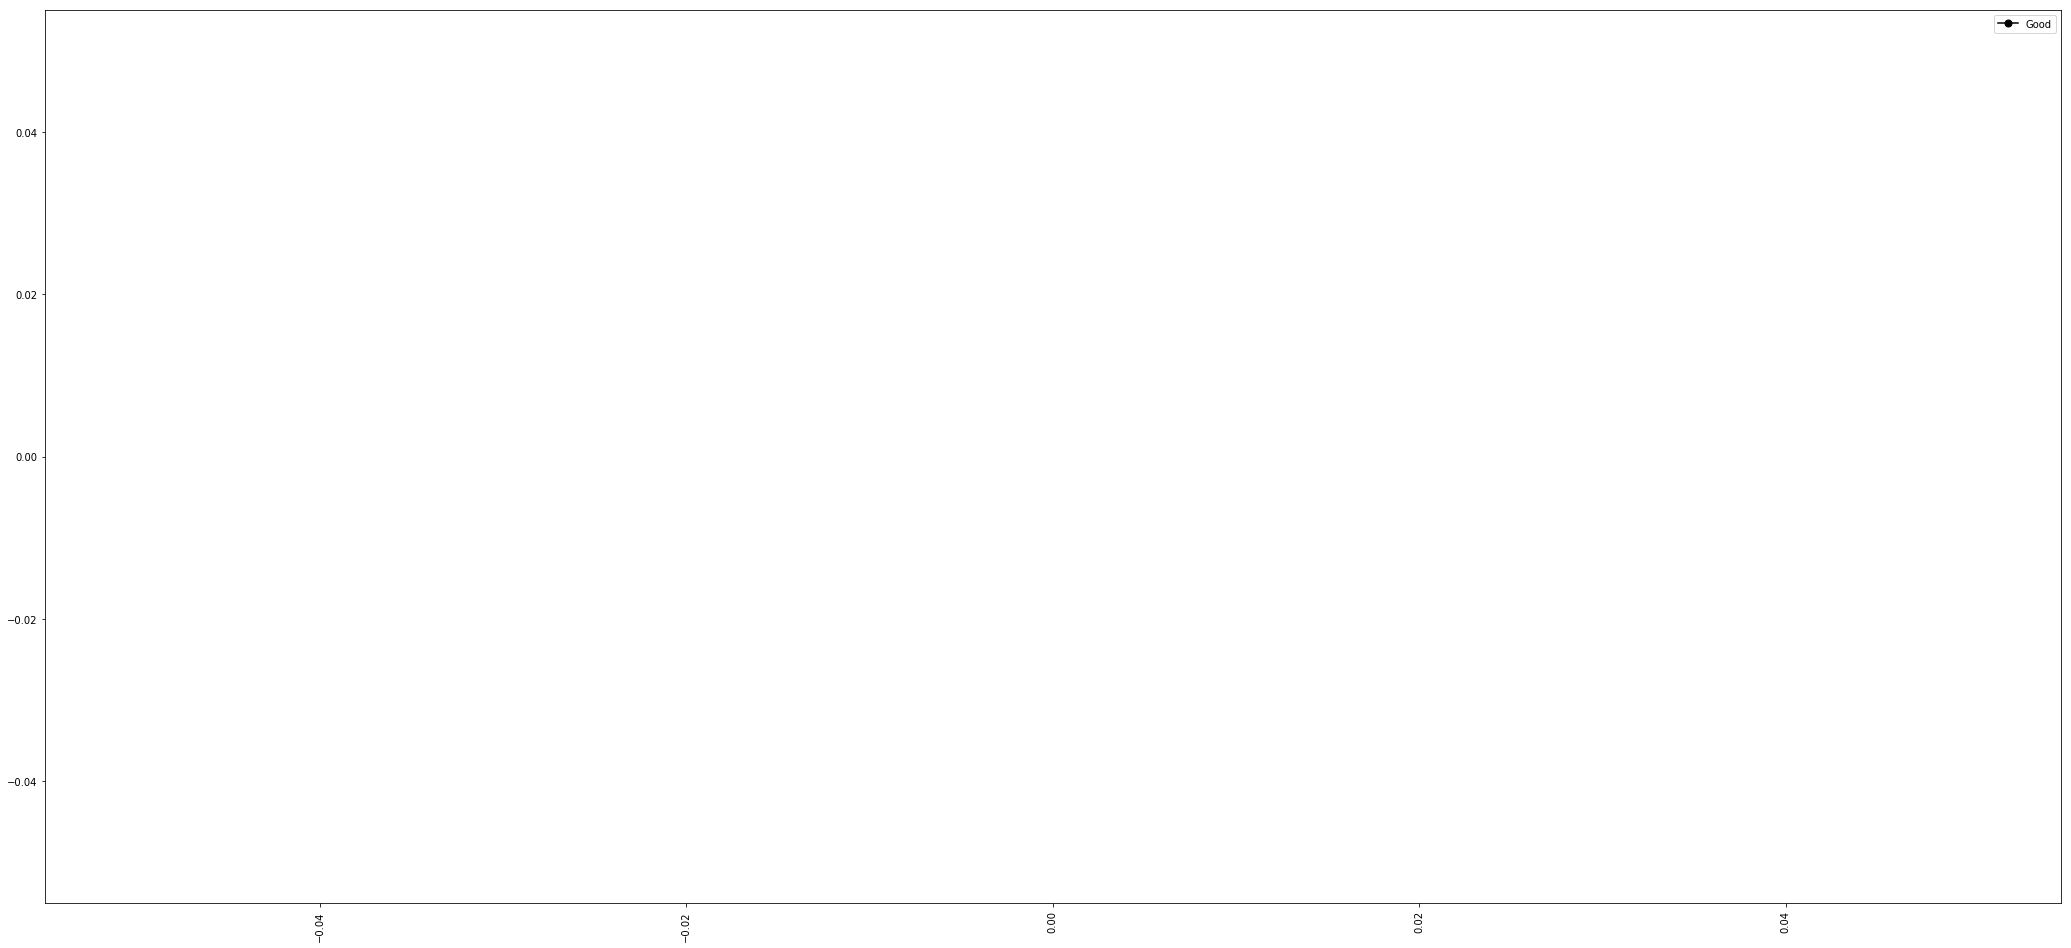

In [108]:
def plot_site(df, site_id):
    unique_years = df["Year"].unique()
    print("site id:", site_id, "years:", unique_years)
    for i in range(len(unique_years)):
        current_year = unique_years[i]
        start_year = str(current_year)+"-01-1"
        end_year = str(current_year)+"-12-31"
        df_sub = df[df['Date'].str.contains(str(current_year))]
#         df[(df["Date"] >= start_year) &
#                          (df["Date"] <= end_year)]
        plot_save_figure(df_sub, site_id, current_year)
        
        
def generate_all_years(df, site_id):
    index = 0
    years = df["Year"].unique()
    fig, axs = plt.subplots(len(years), figsize=(40, 17)) 
    for year in years:
        selected_year = str(year)
        ax = axs[index]
        df_sub = df[df['Date'].str.contains(selected_year)]
        plot_save_figure(df_sub, site_id, selected_year, ax)
        index +=1
        plt.xticks(rotation=90)
        for ax in axs.flat:
            ax.set_xlabel('Day')
            ax.legend()
#             ax.label_outer()


        
def plot_save_figure(df, site_id, year):
    title = site_id + " in " + str(year)
    path = "/Users/saraawad/Desktop/Sites/" + site_id + "/"
    if not os.path.exists(path):
        os.mkdir(path)
    file_name = site_id + "_" + str(year)
    fig, ax = plt.subplots(figsize=(40, 17))
    fig.subplots_adjust(bottom=0.15, left=0.2)
    df_good = df[df["Day Status"] == "Good"]
    df_bad = df[df["Day Status"] == "Bad"]
    ax.plot(df_good["Date"], df_good["Day Status"], marker='o', markersize=7.0, color='black', label="Good")
    ax.plot(df_bad["Date"], df_bad["Day Status"], marker='^', markersize=7.0, color='red', label="Bad")
    plt.xticks(rotation=90)
    ax.legend()
    plt.show()
#     plt.title(title)
#     fig.savefig(path + file_name)
    plt.close(fig) 
    
def plot_all(df):
    unique_sites = df["Site Id"].unique()
    for i in range(len(unique_sites)):
        site_id = unique_sites[i]
        if i == 1:
            break
        df_site = df[df["Site Id"] == site_id]
#         generate_all_years(df_site, site_id)
        plot_site(df_site, site_id)

plot_all(df)

<h3> Get good days (48 half-hourly) per site </h3>

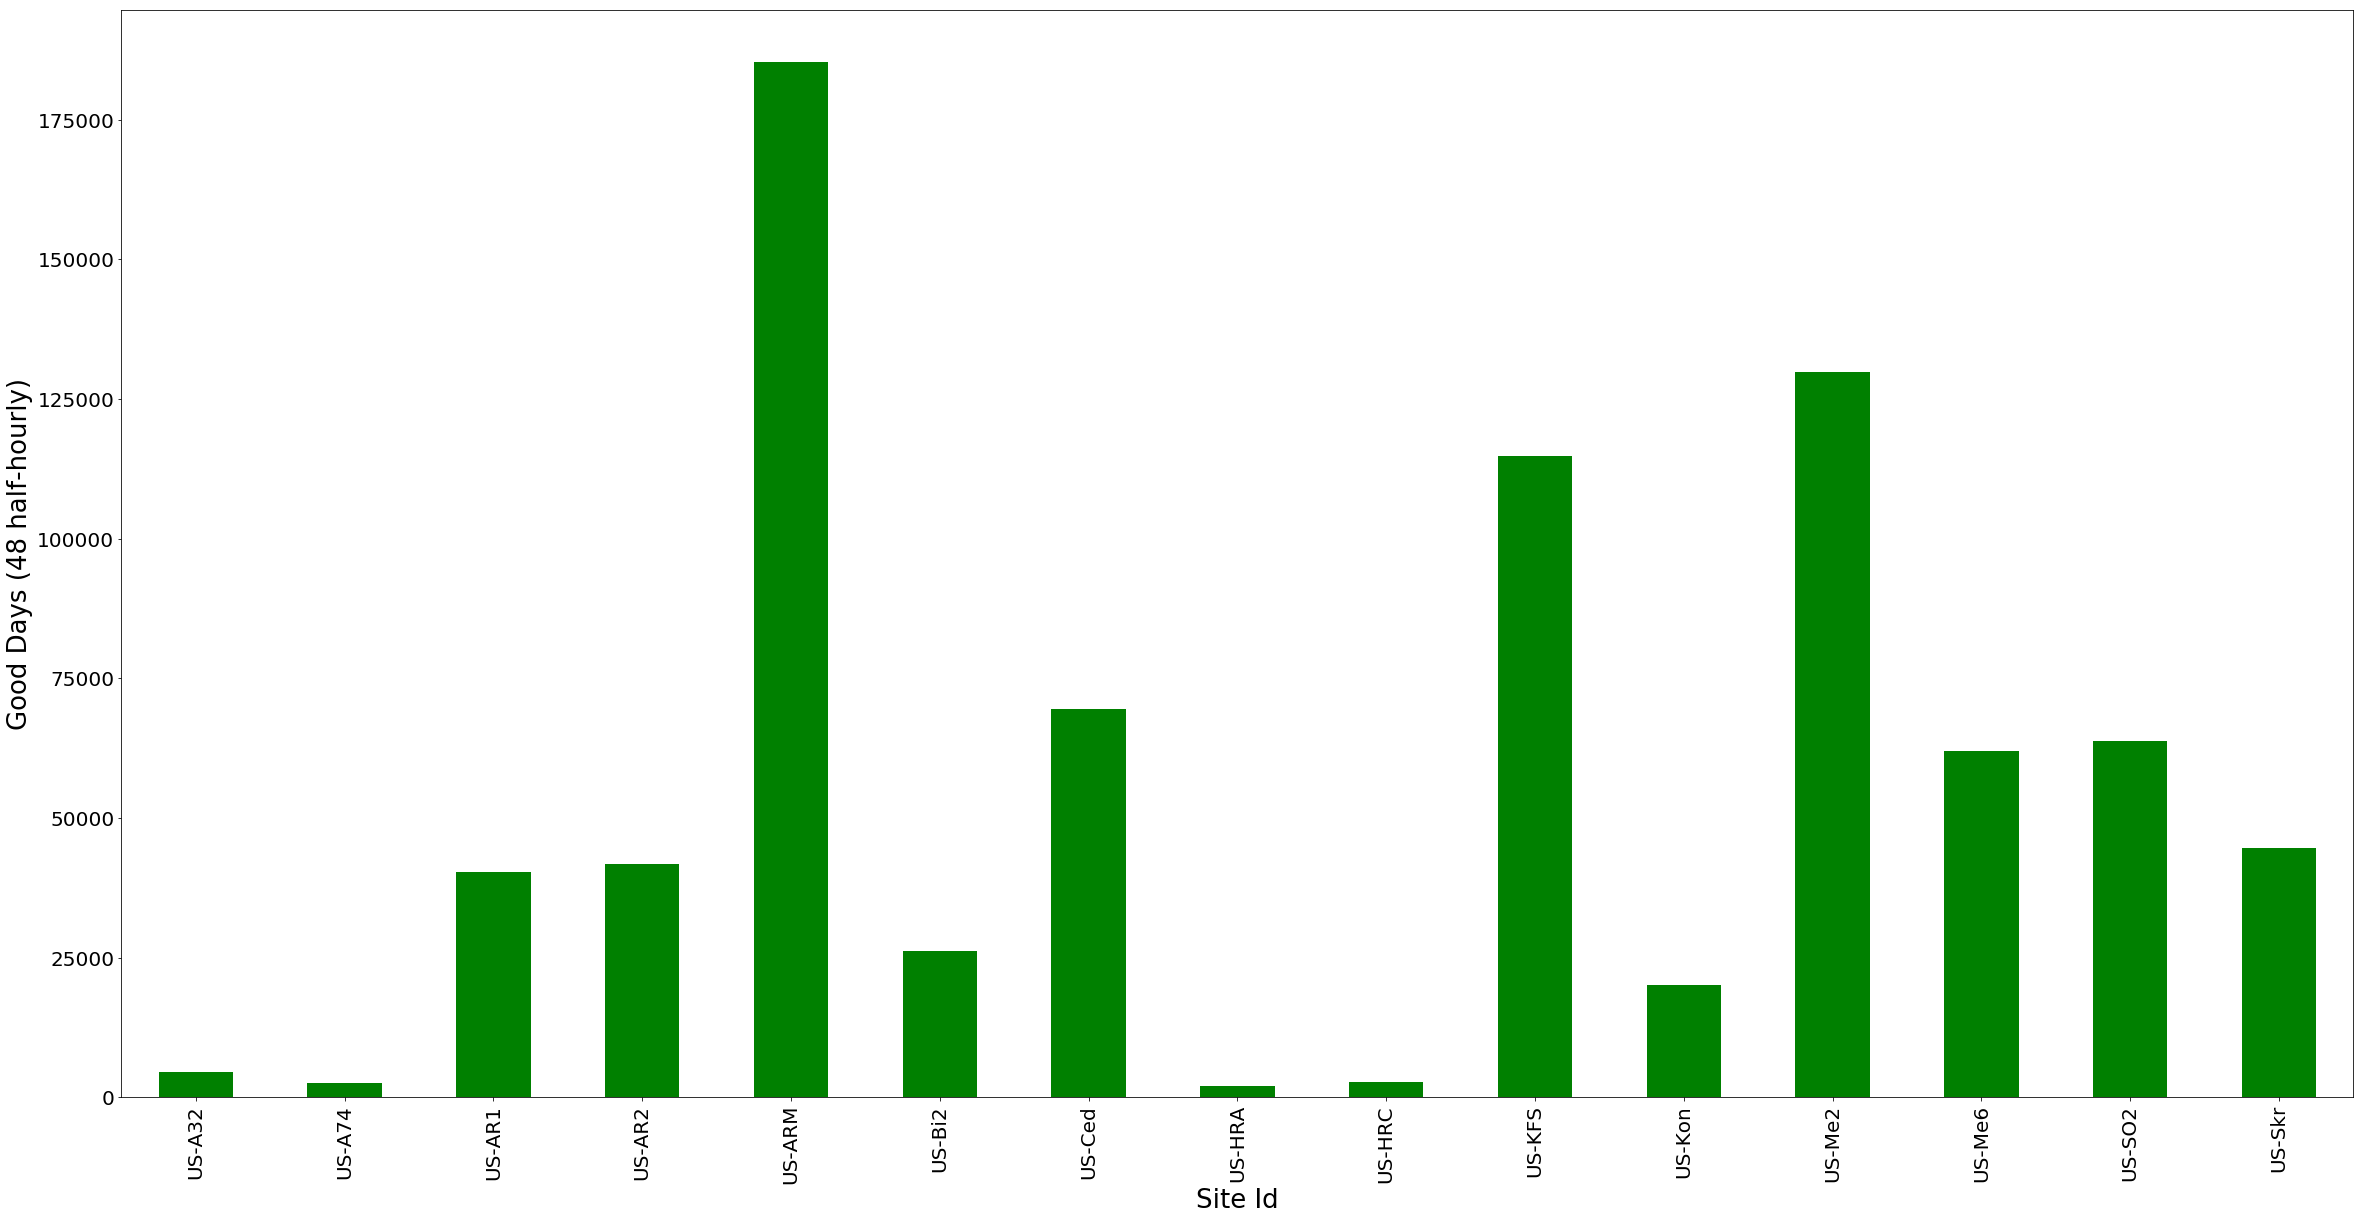

In [19]:
file_path = os.path.join(base_path, "Ameriflux_Daily_Hours_Frequency_Per_Category.csv")
df_frequency = pd.read_csv(file_path, delimiter=',')

df_frequency_good = df_frequency[(df_frequency["Frequency"] == 48) & (df_frequency["Category"] == "GD")]

def group_sites_good_days(df):
    dictionary = {
        "Frequency": "sum"
    }
    df = df.groupby(['Site Id', 'Category'], as_index=False).agg(dictionary)
    return df

df_frequency_good = group_sites_good_days(df_frequency_good)
df_frequency_good

ax = df_frequency_good.plot.bar(x='Site Id', y='Frequency', figsize=(40, 20),
                     color="Green", legend=False, fontsize=20)
ax.set_xlabel("Site Id", fontsize=26)
ax.set_ylabel("Good Days (48 half-hourly)", fontsize=26)
plt.xticks(rotation=90)
plt.show()

<h3> Plot good half-hourly per day per site </h3>

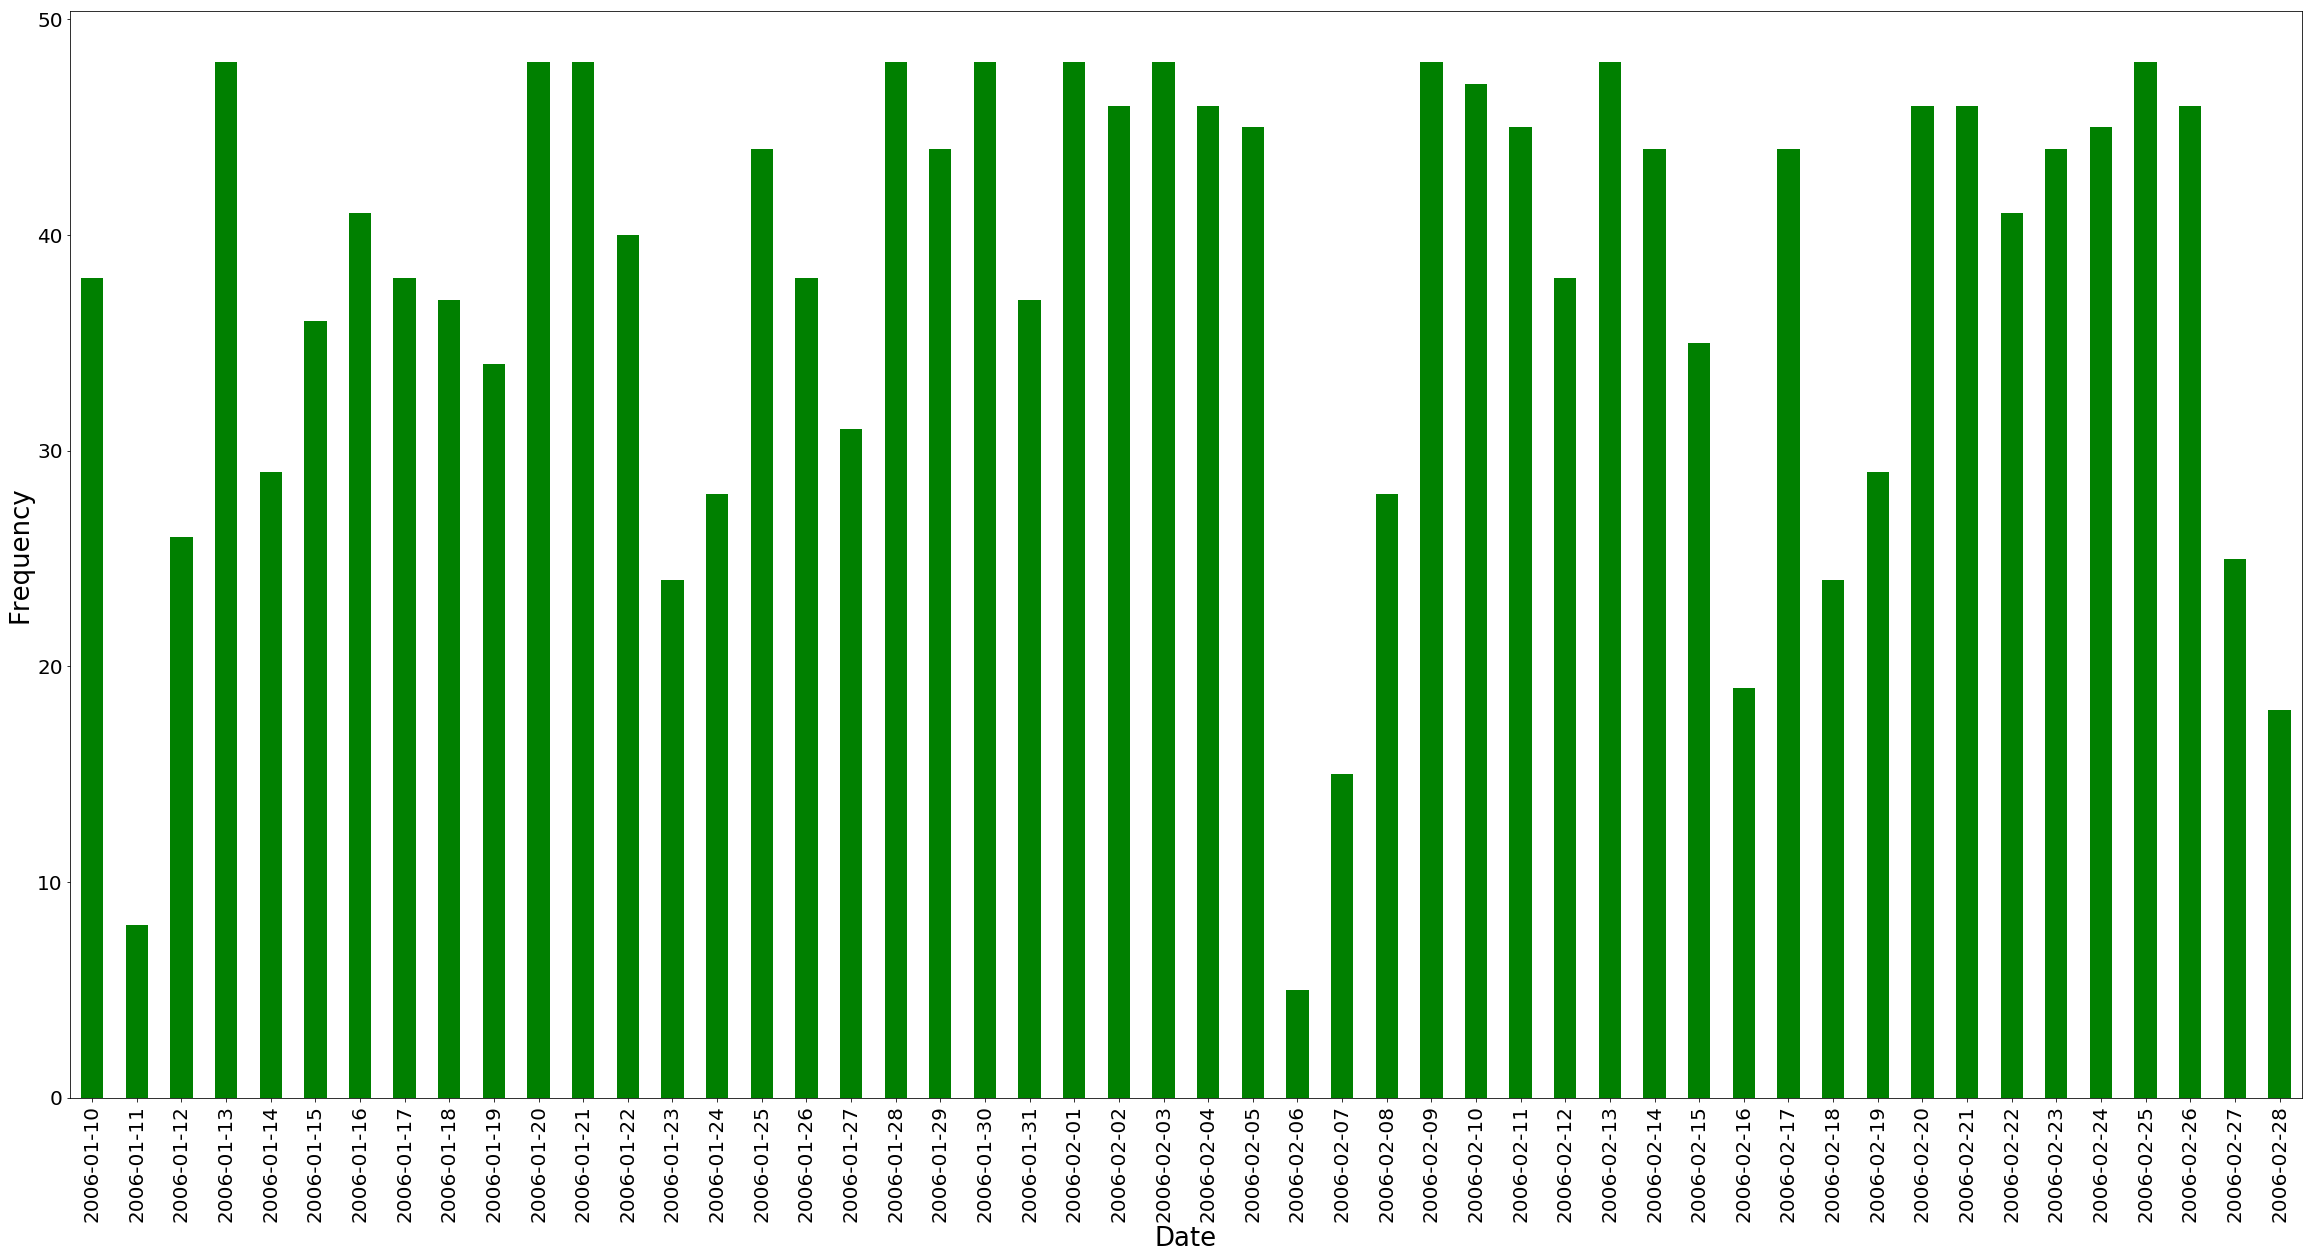

In [59]:
site_id = "US-SO2"
year = 2006
df_site = df_frequency[(df_frequency["Site Id"] == site_id) & (df_frequency["Year"] == 2006) &
                (df_frequency["Category"] == "GD")]

start_year = str(year)+"-01-1"
end_year = str(year)+"-02-31"
df_sub = df_site[(df_site["Date"] >= start_year) & (df_site["Date"] <= end_year)]
df_sub

path = "/Users/saraawad/Desktop/Good Data/" + site_id + "/"
if not os.path.exists(path):
    os.mkdir(path)
file_name = site_id + "_" + str(start_year) + "_" + str(end_year)
# fig, ax = plt.subplots(nrows=2, ncols=3)  
# fig.subplots_adjust(bottom=0.15, left=0.2)
ax = df_sub.plot.bar(x='Date', y='Frequency', figsize=(40, 20),
                     color="Green", legend=False, fontsize=20)
ax.set_xlabel("Date", fontsize=26)
ax.set_ylabel("Frequency", fontsize=26)
plt.xticks(rotation=90)
plt.savefig(path + file_name, bbox_inches='tight')
plt.show()
plt.close(fig) 

<h3> Plot % bad days per site </h3>

In [2]:
file_path = os.path.join(base_path, "Ameriflux_Sites_Percent_Missing_Data.csv")
df_mv = pd.read_csv(file_path, delimiter=',')
df_mv

ax = df_mv.plot.bar(x='Site Id', y='Bad Count %', figsize=(40, 20), legend=False, fontsize=20, color="Red")
ax.set_xlabel("Site Id", fontsize=26)
ax.set_ylabel("Bad Days %", fontsize=26)
plt.xticks(rotation=90)
plt.show()

In [3]:
df_mv

Site Id  Number of Days  Bad Count %
0   US-Bi2             731        22.71
1   US-ARM            6891        27.60
2   US-KFS            4041        28.24
3   US-AR1            1549        32.34
4   US-AR2            1606        36.18
5   US-Me2            7814        40.90
6   US-SO2            3681        40.94
7   US-Me6            4006        46.85
8   US-Kon            2902        47.66
9   US-Ced            4383        50.29
10  US-Skr            3106        61.94
11  US-HRC             278        62.95
12  US-HRA             268        64.55
13  US-A32            1368        72.44
14  US-A74            1336        77.47
15  US-MMS            8261        89.55
16  US-Wgr             366        99.73

In [4]:
file_path = os.path.join("/Users/saraawad/Desktop/Datasets/Google/", "filtered_sites.xlsx")
sites_df = pd.read_excel(file_path)
sites_df

Site Id   Latitude   Longitude Years Data Collected:
0   US-ARM  36.605800  -97.488800           2002 - 2019
1   US-AR2  36.635800  -99.597500           2009 - 2012
2   US-KFS  39.056100  -95.190700           2007 - 2019
3   US-Wgr  45.112865 -122.656026           2014 - 2019
4   US-Kon  39.082400  -96.560300           2006 - 2019
5   US-Bi2  38.109000 -121.535000           2017 - 2019
6   US-Me2  44.452300 -121.557400           2002 - 2019
7   US-A74  36.808464  -97.548854           2016 - 2019
8   US-HRC  34.585722  -91.747528           2017 - 2017
9   US-SO2  33.373800 -116.622800           1997 - 2019
10  US-Ced  39.837900  -74.379100           2005 - 2019
11  US-AR1  36.426700  -99.420000           2009 - 2019
12  US-Skr  25.362933  -81.077582           2004 - 2019
13  US-A32  36.819268  -97.819772           2015 - 2019
14  US-HRA  34.583300  -91.747958           2017 - 2017
15  US-MMS  39.323200  -86.413100           1999 - 2019
16  US-Me6  44.323284 -121.607800           2010 - 2019

Sites to take are:
1. US-Ced: 2005-2019
2. US-ARM: 2002-2019
3. US-Me2: 2002-2019

<h3> Get only sites having least missing days </h3>

In [5]:
file_path = os.path.join(base_path, "Ameriflux_Daily_Cleaned_Filtered.csv")
df_daily = pd.read_csv(file_path, delimiter=',')
df_daily.head()

Site Id        Date Day Status         RH      NETRAD         TA   P  \
0  US-SO2  1997-03-20       Good  14.977021  124.108936  19.159787 NaN   
1  US-SO2  1997-03-21       Good  13.352500  118.805042  16.297917 NaN   
2  US-SO2  1997-03-22       Good  30.883750  115.153542  12.452083 NaN   
3  US-SO2  1997-03-23       Good  80.946250  109.995417   6.886250 NaN   
4  US-SO2  1997-03-24       Good  50.548750  157.244792  13.272500 NaN   

         WS  H2O           H           ...             WS_PI_F_1_1_1  Year  \
0  1.685319  NaN   59.632553           ...                       NaN  1997   
1  1.997708  NaN   91.471875           ...                       NaN  1997   
2  1.835208  NaN   98.225833           ...                       NaN  1997   
3  2.393125  NaN   97.489167           ...                       NaN  1997   
4  1.569167  NaN  104.278750           ...                       NaN  1997   

   Month  Day   LE (mm)  LE_1_1_1(mm)  LE_PI_F(mm)  LE_PI_F_1_1_1(mm)  \
0      3   20  3.829840           NaN          NaN                NaN   
1      3   21  4.196744           NaN          NaN                NaN   
2      3   22  3.167538           NaN          NaN                NaN   
3      3   23  1.492492           NaN          NaN                NaN   
4      3   24  3.865368           NaN          NaN                NaN   

   LE_SSITC_TEST(mm)  LE_SSITC_TEST_1_1_1(mm)  
0                NaN                      NaN  
1                NaN                      NaN  
2                NaN                      NaN  
3                NaN                      NaN  
4                NaN                      NaN  

[5 rows x 36 columns]

<h3> Export selected sites ameriflx daily </h3>

In [82]:
df_mv.head(3)
sites_to_get = list(df_mv.head(3)["Site Id"])
sites_to_get
for i in range(len(sites_to_get)):
    site_id = sites_to_get[i]
    df_site = df_daily[df_daily["Site Id"] == site_id]
    export_path = os.path.join(base_path, site_id + "_Ameriflux_Daily.csv")
    export_csv = df_site.to_csv (export_path, index = None, header=True)

In [94]:
file_path = os.path.join("/Users/saraawad/Desktop/Datasets/Google/", "US-Ced_Ameriflux_Daily.csv")
site_df = pd.read_csv(file_path)
site_df.head()
site_df_tmp = site_df.dropna(subset=['LE'], how='all')

In [95]:
site_df_tmp.shape

(2744, 36)